# K-최근접 이웃 회귀: K계수 최근접하는 회귀 알고리즘

## 분류(Classification): 이진 혹은 다중으로 디지털처럼 나누는 것
## 회귀(Regression): 어떤 한 접점(평균)으로 가까워지는 것
   ex) 평균적으로 키가 큰 사람의 아이가 부모보다 더 크지 않는다라는 사실을 관찰하고 이를 '평균으로 회귀한다'라고 표현 가능 -> 변수들간의 상관관계를 분석

In [7]:
import numpy as np

# 농어 데이터 준비
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

print(perch_length.size)
print(perch_weight.size)

56
56


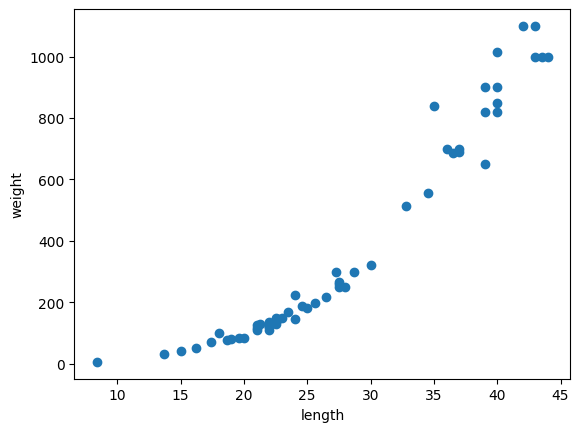

In [8]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 특징1: 포물선 곡선을 나타내며 농어의 길이가 커짐에 따라 무게도 늘어나는 특징을 가짐

In [10]:
# 사이킷런을 통해서 원본 데이트를 가지고 훈련 데이터와 테스트 데이터를 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [15]:
# 사이킷런을 사용하기 위해 1차원으로 된 데이터들을 2차원으로 변경
# 예제
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [18]:
train_input = train_input.reshape(-1, 1)   # 첫번째 크기는 그대로 두고 두번째 크기는 1로 세팅
print(train_input.shape)
test_input = test_input.reshape(-1, 1)   # 첫번째 크기는 그대로 두고 두번째 크기는 1로 세팅
print(test_input.shape)

(42, 1)
(14, 1)


In [19]:
# 훈련 데이터를 가지고 K-최근접 이웃 회귀 알고리즘을 사용하여 회귀 모델을 만들기
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()  # k-최근접 이웃 회귀 모델 알고리즘 사용
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [20]:
knr.score(test_input, test_target)  # 결정계수 점수

0.992809406101064

결정계수(R2)의 식

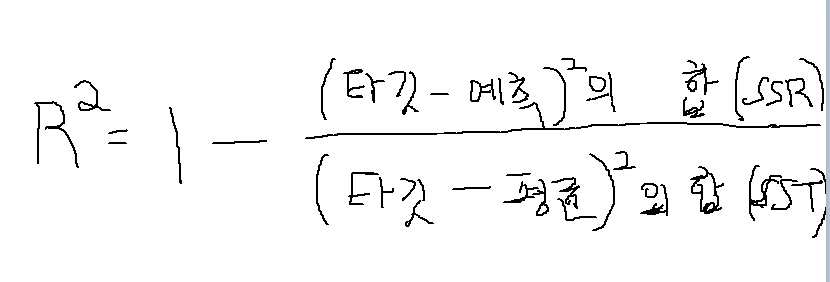

In [23]:
# 위에서 훈련한 모델을 가지고 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

print(test_target)
print(test_prediction)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [25]:
# 테스트 세트에 대한 평균 절대값 오차 계산하기
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과대적합: 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 너무 나쁘면 해당 모델은 과대적합되었다라고 할 수 있음
# 과소적합: 훈련 세트에서 테스트 세트보다 점수가 너무 낮은면 해당 모델은 과소적합되었다라고 할 수 있음

  -> 위의 결과는 '과소적합'되었다라고 말할 수 있음. 왜냐하면 훈련 세트가 테스트 세트 점수보다 낮게 나왔기 때문

In [27]:
# 시도1 -> 과소적합을 피하기 위해 k-최근접 이웃 회귀 알고리즘의 파라미터 값을 수정해봄

# 이웃의 계수(k계수) 값을 3으로 변경
knr.n_neighbors = 3
# 모델을 다시 훈련
knr.fit(train_input, train_target)
# 훈련 세트와 테스트 세트 점수를 다시 계산
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

print('-' * 50)

# 테스트 세트에 대한 평균 절대값 오차 계산하기
from sklearn.metrics import mean_absolute_error

# 위에서 훈련한 모델을 가지고 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

0.9804899950518966
0.9746459963987609
--------------------------------------------------
35.42380952380951


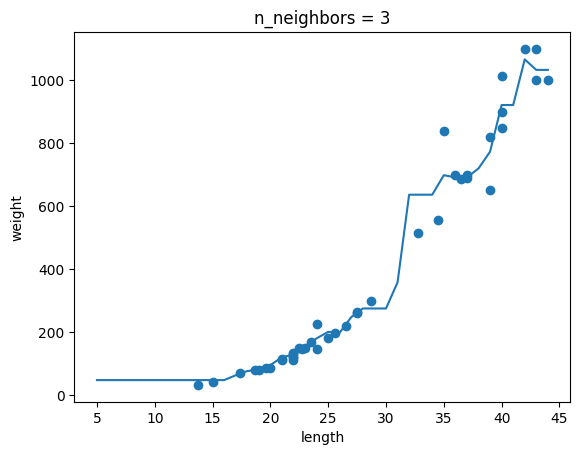

In [37]:
import matplotlib.pyplot as plt

# length에 해당하는 x좌표 생성
x = np.arange(5, 45).reshape(-1, 1)

# k_neighbors = 1, 3, 5일 때 그래프(혹은 기타 n)
k_neighbors = 3

knr.n_neighbors = k_neighbors
knr.fit(train_input, train_target)
# 지정한 x범위에 대한 예측 구하기
prediction = knr.predict(x)   # x는 길이 prediction값은 무게

plt.scatter(train_input, train_target)
plt.plot(x, prediction)  # plot으로 된 line을 표시
plt.title('n_neighbors = {}'.format(k_neighbors))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()